In [14]:
import pandas as pd
import pickle

with open('shows.pickle', 'rb') as handle:
    show_dict = pickle.load(handle)

# vote average is the percent that appears on the site.

In [15]:
show_dict['24 ']

{'backdrop_path': '/zyiX7iPUfuxV4ZAuCaTdmFeEYLQ.jpg',
 'first_air_date': '2001-11-06',
 'genre_ids': [10759, 18],
 'id': 1973,
 'name': '24',
 'origin_country': ['US'],
 'original_language': 'en',
 'original_name': '24',
 'overview': '24 is an American television series produced for the Fox network and syndicated worldwide, starring Kiefer Sutherland as Counter Terrorist Unit agent Jack Bauer. Each 24-episode season covers 24 hours in the life of Bauer, using the real time method of narration.',
 'popularity': 9.671869,
 'poster_path': '/3m83XvlgjIMeBtCHlIyLAsa2GZ1.jpg',
 'vote_average': 7.64,
 'vote_count': 296}

In [16]:
print(len(show_dict['24 '].keys()))
show_dict['24 '].keys()

13


dict_keys(['poster_path', 'overview', 'id', 'first_air_date', 'original_name', 'origin_country', 'vote_count', 'popularity', 'vote_average', 'original_language', 'genre_ids', 'name', 'backdrop_path'])

In [17]:
def clean_show_dict(show_dict):
    #i was too lazy when i made this original dictionary
    show_list = list(show_dict.keys())

    new_dict = dict((x, []) for x in show_dict[show_list[0]])

    for show in show_list:
        for key in new_dict.keys():
            new_dict[key].append(show_dict[show][key])

    new_dict['show_name'] = show_list
    return new_dict

show_dict = clean_show_dict(show_dict)

In [18]:
df = pd.DataFrame(show_dict)

In [19]:
df.shape

(1745, 14)

In [20]:
df.head()

,backdrop_path,first_air_date,genre_ids,id,name,origin_country,original_language,original_name,overview,popularity,poster_path,show_name,vote_average,vote_count
0,/6823RHRgSc7i2LN6vElijhgEpYn.jpg,2010-04-02,[18],18660,Miami Medical,[US],en,Miami Medical,Miami Medical is a medical drama television se...,1.777288,/hMpvRXsuUhUpBYUoq4UpfW3v9Yc.jpg,Miami Medical,8.00,2
1,/byVBOPWGl6APKuypsCeiirkld0t.jpg,2007-07-24,"[9648, 18]",4920,Damages,[US],en,Damages,Damages is an American legal thriller televisi...,5.754421,/b6QRJHGJjlRqbH4js7p0cTEwWOh.jpg,Damages,7.15,49
2,/pPYsPeUoAMS0kz3bMo74rKgAHfB.jpg,1961-09-16,[18],11515,The Defenders,[US],en,The Defenders,The Defenders is an American courtroom drama s...,3.658875,/gR65Pzr2lYRWFF8VgR9zB4HcOME.jpg,The Defenders,9.00,1
3,/xhFP9ZruWe303TW8vQPJDRWivm9.jpg,2015-03-01,"[35, 18]",61676,Battle Creek,[US],en,Battle Creek,"In this mismatched buddy cop dramedy, an amazi...",2.650440,/3Mr4K88qw4qh3DhCqj5wLvi3iRg.jpg,Battle Creek,6.43,20
4,/zyiX7iPUfuxV4ZAuCaTdmFeEYLQ.jpg,2001-11-06,"[10759, 18]",1973,24,[US],en,24,24 is an American television series produced f...,9.671869,/3m83XvlgjIMeBtCHlIyLAsa2GZ1.jpg,24,7.64,296


In [26]:
df.first_air_date = df.first_air_date.apply(lambda x: pd.to_datetime(x))

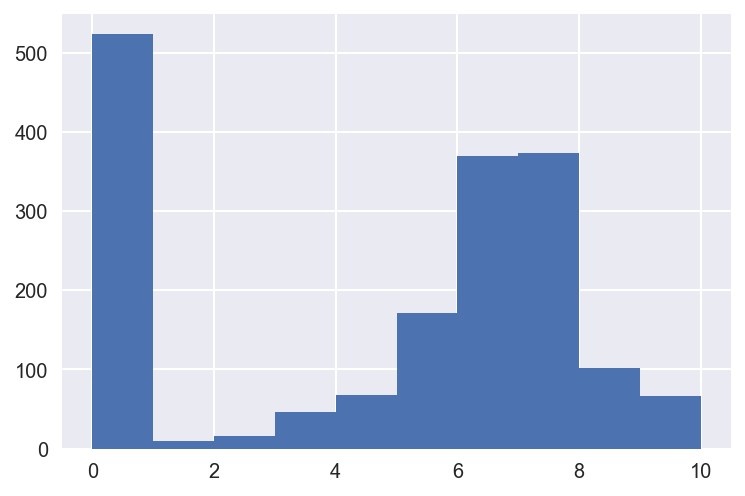

In [29]:
import matplotlib.pyplot as plt
import seaborn
% matplotlib inline
%config InlineBackend.figure_format = 'retina'

df.vote_average.hist();

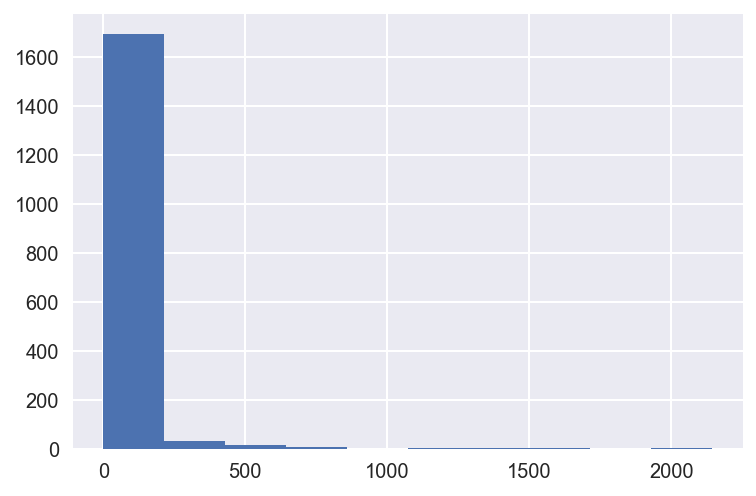

In [30]:
df.vote_count.hist();

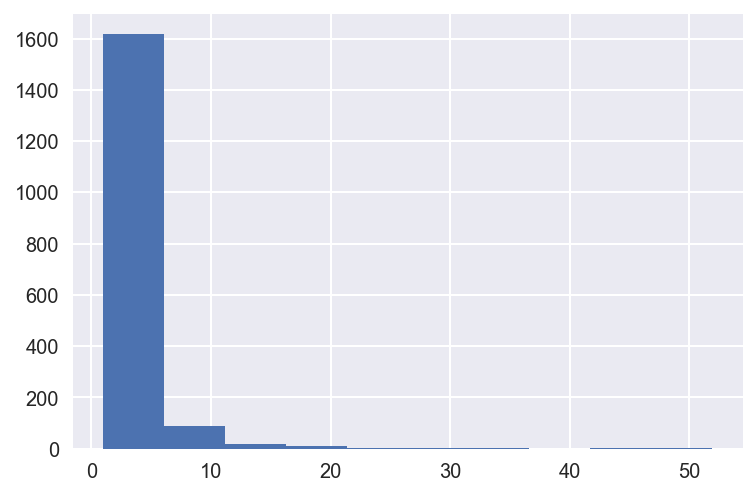

In [31]:
df.popularity.hist();

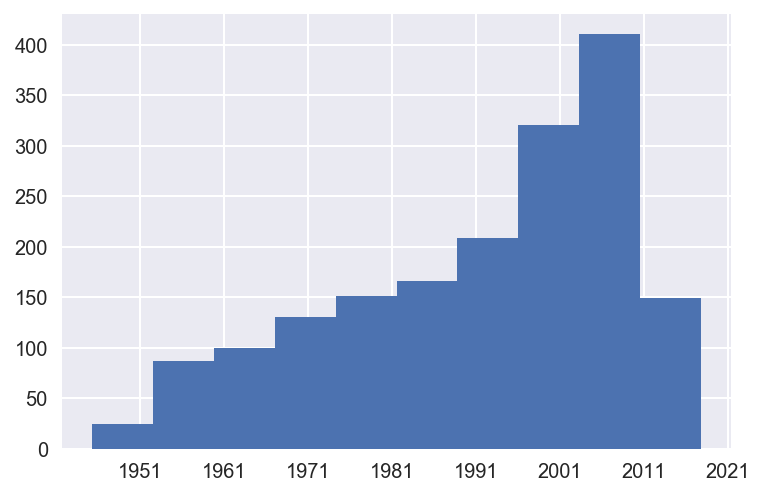

In [32]:
df.first_air_date.hist();

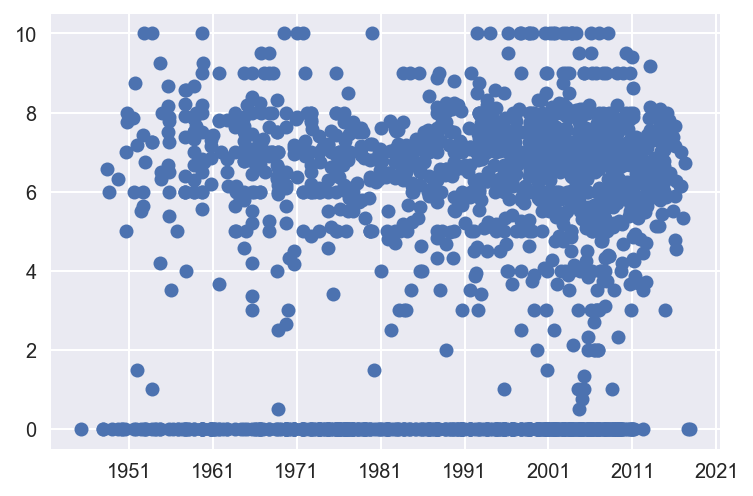

In [34]:
plt.plot(df.first_air_date, df.vote_average, 'o');

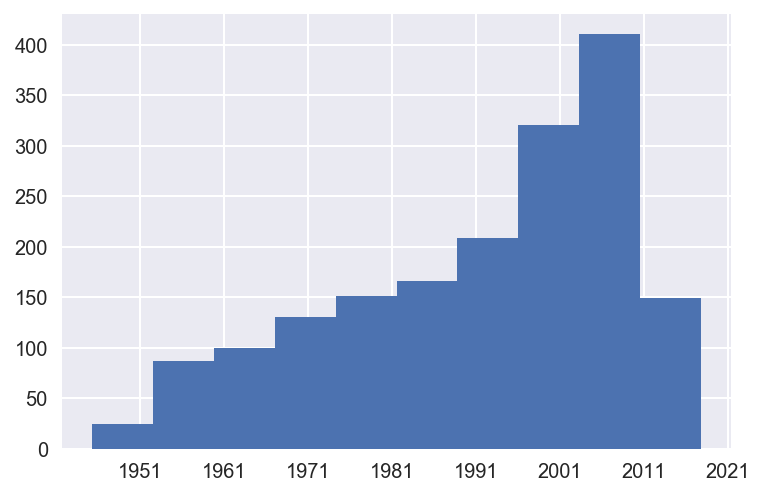

In [52]:
df.first_air_date.hist();

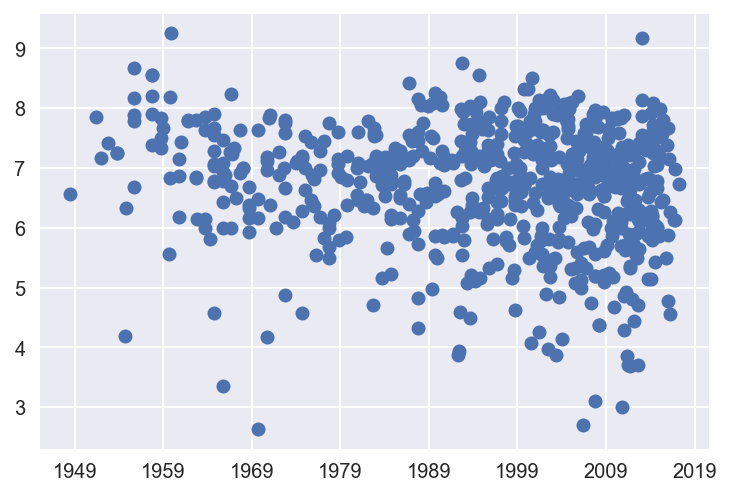

In [35]:
my_filter = df.vote_count > 5

plt.plot(df[my_filter].first_air_date, df[my_filter].vote_average, 'o');

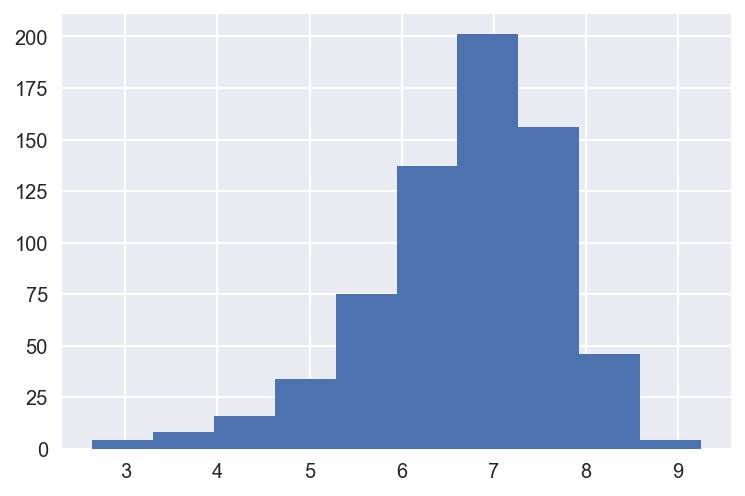

In [40]:
df[my_filter].vote_average.hist();

In [36]:
import time

df['first_air_date_unix'] = df.first_air_date.apply(lambda x: time.mktime(x.timetuple()))

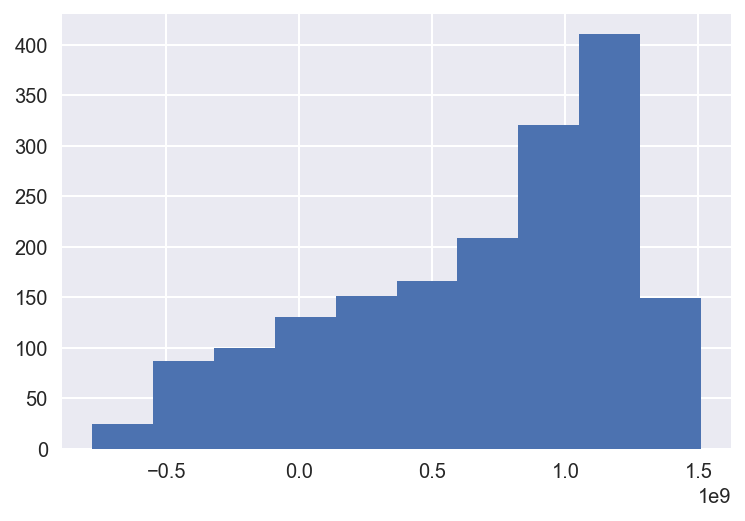

In [37]:
df.first_air_date_unix.hist();

In [38]:
df.first_air_date_unix = df.first_air_date_unix+df.first_air_date_unix.min()*-1

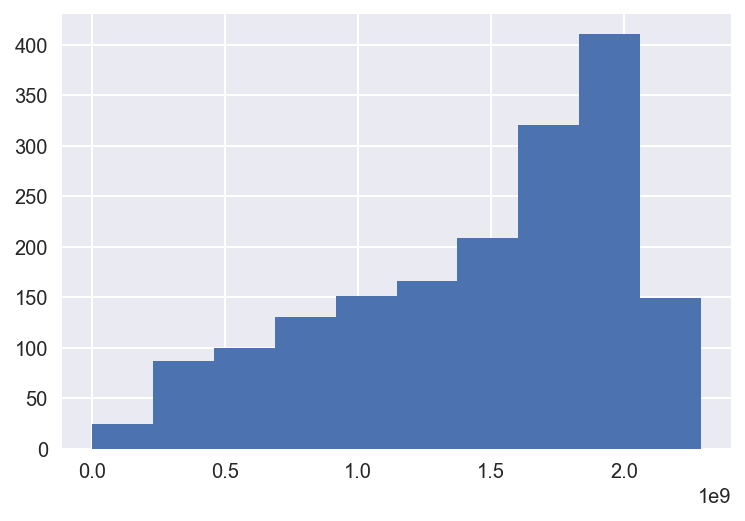

In [39]:
df.first_air_date_unix.hist();

In [44]:
from sklearn import linear_model

X = df[my_filter].first_air_date_unix.values
y = df[my_filter].vote_average.values

lr = linear_model.LinearRegression()
lr.fit(X.reshape(-1,1),y.reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [51]:
lr.score(X.reshape(-1,1),y.reshape(-1,1))

0.020311004634826602

In [53]:
lr.coef_

array([[ -2.78501148e-10]])